In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
pd.set_option("display.max_columns",None)

In [2]:
train=pd.read_csv("train.csv")

test=pd.read_csv("test.csv")

In [3]:
print(train.shape)

print(test.shape)

(1460, 81)
(1459, 80)


In [4]:
len(train)

1460

## Null Features

In [5]:
trainull=[i for i in train.columns if train[i].isnull().sum()>0]

testnull=[i for i in test.columns if test[i].isnull().sum()>0]

## Lookout for null features that have more than 50% missing values

In [6]:
traincnt=[(i,(train[i].isnull().sum()/len(train))*100) for i in trainull]
train50null=[i for i in trainull if ((train[i].isnull().sum()/len(train))*100)>50]

testcnt=[(j,(test[j].isnull().sum()/len(test))*100) for j in testnull]
test50null=[j for j in testnull if ((test[j].isnull().sum()/len(test))*100)>50]

In [7]:
train50null

['Alley', 'PoolQC', 'Fence', 'MiscFeature']

In [8]:
test50null

['Alley', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature']

In [9]:
traincnt

[('LotFrontage', 17.73972602739726),
 ('Alley', 93.76712328767123),
 ('MasVnrType', 0.547945205479452),
 ('MasVnrArea', 0.547945205479452),
 ('BsmtQual', 2.5342465753424657),
 ('BsmtCond', 2.5342465753424657),
 ('BsmtExposure', 2.6027397260273974),
 ('BsmtFinType1', 2.5342465753424657),
 ('BsmtFinType2', 2.6027397260273974),
 ('Electrical', 0.0684931506849315),
 ('FireplaceQu', 47.26027397260274),
 ('GarageType', 5.5479452054794525),
 ('GarageYrBlt', 5.5479452054794525),
 ('GarageFinish', 5.5479452054794525),
 ('GarageQual', 5.5479452054794525),
 ('GarageCond', 5.5479452054794525),
 ('PoolQC', 99.52054794520548),
 ('Fence', 80.75342465753424),
 ('MiscFeature', 96.30136986301369)]

In [10]:
testcnt

[('MSZoning', 0.2741603838245374),
 ('LotFrontage', 15.558601782042494),
 ('Alley', 92.66620973269363),
 ('Utilities', 0.1370801919122687),
 ('Exterior1st', 0.06854009595613435),
 ('Exterior2nd', 0.06854009595613435),
 ('MasVnrType', 1.0966415352981496),
 ('MasVnrArea', 1.0281014393420151),
 ('BsmtQual', 3.015764222069911),
 ('BsmtCond', 3.0843043180260454),
 ('BsmtExposure', 3.015764222069911),
 ('BsmtFinType1', 2.878684030157642),
 ('BsmtFinSF1', 0.06854009595613435),
 ('BsmtFinType2', 2.878684030157642),
 ('BsmtFinSF2', 0.06854009595613435),
 ('BsmtUnfSF', 0.06854009595613435),
 ('TotalBsmtSF', 0.06854009595613435),
 ('BsmtFullBath', 0.1370801919122687),
 ('BsmtHalfBath', 0.1370801919122687),
 ('KitchenQual', 0.06854009595613435),
 ('Functional', 0.1370801919122687),
 ('FireplaceQu', 50.03427004797807),
 ('GarageType', 5.20904729266621),
 ('GarageYrBlt', 5.346127484578479),
 ('GarageFinish', 5.346127484578479),
 ('GarageCars', 0.06854009595613435),
 ('GarageArea', 0.0685400959561343

## Drop the features that have more than 50% missing values 

In [11]:
train=train.drop(columns=train50null)

test=test.drop(columns=test50null)

In [12]:
train=train.drop(columns="FireplaceQu")

In [13]:
train.shape,test.shape

((1460, 76), (1459, 75))

## Numerical Features

In [14]:
train_numfeat=[i for i in train.columns if train[i].dtypes!="O"]

test_numfeat=[i for i in test.columns if test[i].dtypes!="O"]

In [15]:
train[train_numfeat].shape, test[test_numfeat].shape

((1460, 38), (1459, 37))

### Continous Numerical Features

In [16]:
cont_num_trainfeat=[i for i in train_numfeat if len(train[i].unique())>25]

cont_num_testfeat=[i for i in test_numfeat if len(test[i].unique())>25]

### Discrete Numerical Features

In [17]:
disc_num_trainfeat=[i for i in train_numfeat if i not in cont_num_trainfeat]

disc_num_testfeat=[i for i in test_numfeat if i not in cont_num_testfeat]

### Let us handle the missing values in both Continous and Discrete numerical features

#### a) Continous Features

In [18]:
contnum_null_trainfeat=[i for i in cont_num_trainfeat if i in trainull]

contnum_null_testfeat=[i for i in cont_num_testfeat if i in testnull]

In [19]:
contnum_null_trainfeat

['LotFrontage', 'MasVnrArea', 'GarageYrBlt']

In [20]:
for i in contnum_null_trainfeat:
    print(i, "train", (len(train.loc[train[i].isnull()==True])/len(train))*100)
    
for j in contnum_null_testfeat:
    print(j,"test",(len(test.loc[test[j].isnull()==True])/len(test))*100)

LotFrontage train 17.73972602739726
MasVnrArea train 0.547945205479452
GarageYrBlt train 5.5479452054794525
LotFrontage test 15.558601782042494
MasVnrArea test 1.0281014393420151
BsmtFinSF1 test 0.06854009595613435
BsmtFinSF2 test 0.06854009595613435
BsmtUnfSF test 0.06854009595613435
TotalBsmtSF test 0.06854009595613435
GarageYrBlt test 5.346127484578479
GarageArea test 0.06854009595613435


In [21]:
for i in contnum_null_trainfeat:
    train[i]=train[i].fillna(train[i].median())
    
for j in contnum_null_testfeat:
    test[j]=test[j].fillna(test[j].median())

#### b) Discrete Features

In [22]:
discnum_null_trainfeat=[i for i in disc_num_trainfeat if i in trainull]

discnum_null_testfeat=[i for i in disc_num_testfeat if i in testnull]

In [23]:
for i in discnum_null_trainfeat:
    print(i, "train",(len(train.loc[train[i].isnull()==True])/len(train))*100)
    
for j in discnum_null_testfeat:
    print(j, "test",(len(test.loc[test[j].isnull()==True])/len(test))*100)

BsmtFullBath test 0.1370801919122687
BsmtHalfBath test 0.1370801919122687
GarageCars test 0.06854009595613435


In [24]:
for i in discnum_null_trainfeat:
    train[i]=train[i].fillna(train[i].mode()[0])
    
for j in discnum_null_testfeat:
    test[j]=test[j].fillna(test[j].mode()[0])

## Categorical Features

In [25]:
cat_trainfeat=[i for i in train.columns if i not in train_numfeat]

cat_testfeat=[j for j in test.columns if j not in test_numfeat]

### Let us handle the missing values here

In [26]:
catnull_trainfeat=[i for i in cat_trainfeat if i in trainull]

catnull_testfeat=[j for j in cat_testfeat if j in testnull]

In [27]:
for i in catnull_trainfeat:
    print(i,"train",(len(train.loc[train[i].isnull()==True])/len(train))*100)
    
for j in catnull_testfeat:
    print(j,"test",(len(test.loc[test[j].isnull()==True])/len(test))*100) 

MasVnrType train 0.547945205479452
BsmtQual train 2.5342465753424657
BsmtCond train 2.5342465753424657
BsmtExposure train 2.6027397260273974
BsmtFinType1 train 2.5342465753424657
BsmtFinType2 train 2.6027397260273974
Electrical train 0.0684931506849315
GarageType train 5.5479452054794525
GarageFinish train 5.5479452054794525
GarageQual train 5.5479452054794525
GarageCond train 5.5479452054794525
MSZoning test 0.2741603838245374
Utilities test 0.1370801919122687
Exterior1st test 0.06854009595613435
Exterior2nd test 0.06854009595613435
MasVnrType test 1.0966415352981496
BsmtQual test 3.015764222069911
BsmtCond test 3.0843043180260454
BsmtExposure test 3.015764222069911
BsmtFinType1 test 2.878684030157642
BsmtFinType2 test 2.878684030157642
KitchenQual test 0.06854009595613435
Functional test 0.1370801919122687
GarageType test 5.20904729266621
GarageFinish test 5.346127484578479
GarageQual test 5.346127484578479
GarageCond test 5.346127484578479
SaleType test 0.06854009595613435


In [28]:
for i in catnull_trainfeat:
    train[i]=train[i].fillna(train[i].mode()[0])
    
for j in catnull_testfeat:
    test[j]=test[j].fillna(test[j].mode()[0])

## Year Features

In [29]:
trainyr_feat=[i for i in train.columns if "Year" in i or "Yr" in i or "Y" in i or "YEAR" in i or "YR" in i]

testyr_feat=[j for j in test.columns if "Year" in j or "Yr" in j or "Y" in j or "YEAR" in j or "YR" in j]

In [30]:
for i in trainyr_feat:
    if i == "YearBuilt":
        pass
    else:
        train[i]=train[i]-train["YearBuilt"]
        
for j in testyr_feat:
    if j == "YearBuilt":
        pass
    else:
        test[j]=test[j]-test["YearBuilt"]

#### Let us check for negative values in the calculated year features

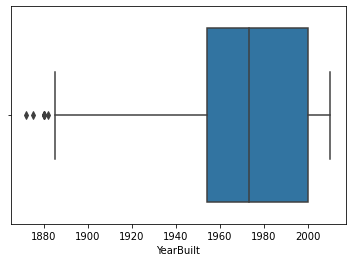

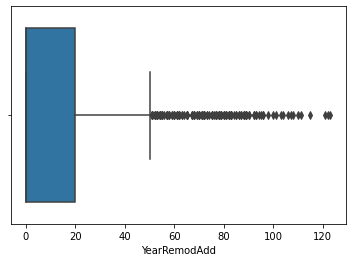

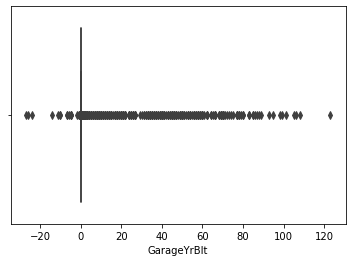

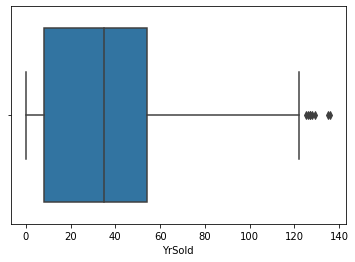

In [31]:
for i in trainyr_feat:
    sb.boxplot(x=train[i])
    plt.show()

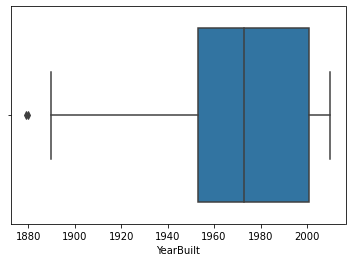

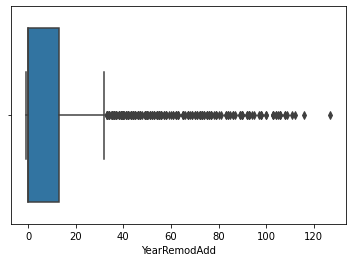

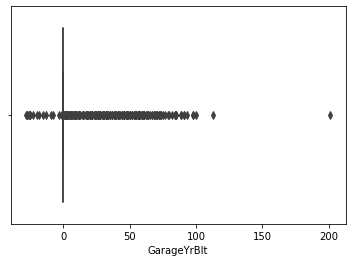

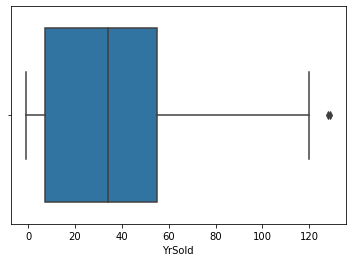

In [32]:
for i in testyr_feat:
    sb.boxplot(x=test[i])
    plt.show()

#### Replace the negative values with Zero(0)

In [33]:
for i in trainyr_feat:
    if i=="YearBuilt":
        pass
    else:
        train.loc[train[i]<0,i]=0
        
for j in testyr_feat:
    if j=="YearBuilt":
        pass
    else:
        test.loc[test[j]<0,j]=0

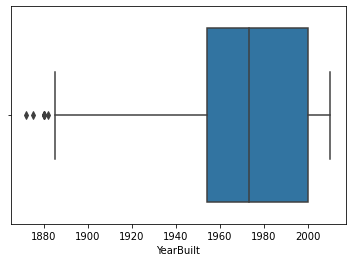

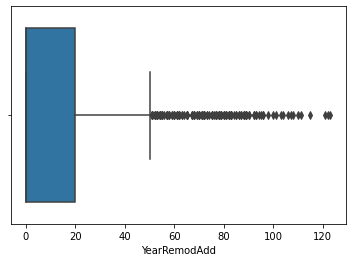

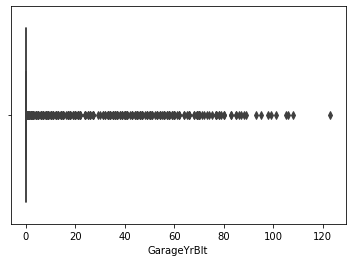

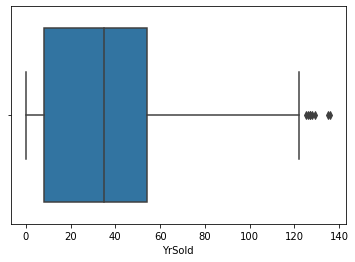

In [34]:
for i in trainyr_feat:
    sb.boxplot(x=train[i])
    plt.show()

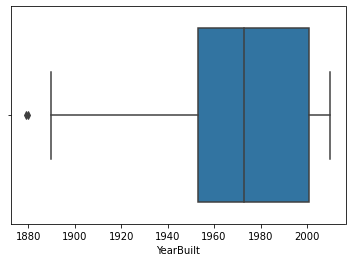

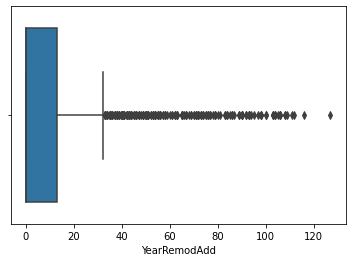

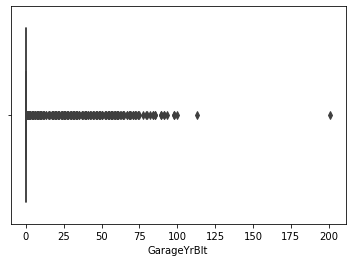

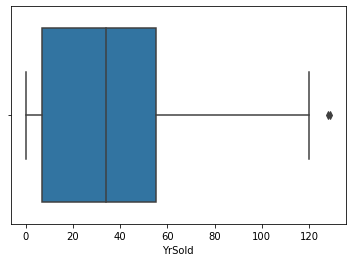

In [35]:
for i in testyr_feat:
    sb.boxplot(x=test[i])
    plt.show()

In [36]:
data=pd.concat([train,test],axis=0)

In [37]:
data.iloc[1460]

Id                 1461
MSSubClass           20
MSZoning             RH
LotFrontage          80
LotArea           11622
                  ...  
MoSold                6
YrSold               49
SaleType             WD
SaleCondition    Normal
SalePrice           NaN
Name: 0, Length: 76, dtype: object

In [38]:
train.shape,test.shape,data.shape

((1460, 76), (1459, 75), (2919, 76))

In [39]:
data=pd.get_dummies(data,drop_first=True)

In [40]:
data.shape

(2919, 234)

In [41]:
dataz=data.loc[:,~data.columns.duplicated()]

dataz.shape

(2919, 234)

In [42]:
data.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_TA,BsmtCond_Gd,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Fa,GarageQual_Gd,GarageQual_Po,GarageQual_TA,GarageCond_Fa,GarageCond_Gd,GarageCond_Po,GarageCond_TA,PavedDrive_P,PavedDrive_Y,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,60,65.0,8450,7,5,2003,0,196.0,706.0,0.0,150.0,856.0,856,854,0,1710,1.0,0.0,2,1,3,1,8,0,0.0,2.0,548.0,0,61,0,0,0,0,0,2,5,208500.0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0

In [43]:
traindata=data.iloc[:1460]
print(traindata.shape)

testdata=data.iloc[1460:]
testdata=testdata.drop(columns="SalePrice")
print(testdata.shape)

(1460, 234)
(1459, 233)


In [44]:
trainx=traindata.drop(columns="SalePrice")

trainy=traindata["SalePrice"]

In [45]:
testx=testdata

In [46]:
from sklearn.ensemble import AdaBoostRegressor,BaggingRegressor,RandomForestRegressor
import xgboost
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score,RandomizedSearchCV
from sklearn.feature_selection import SelectFromModel

In [47]:
rfr=RandomForestRegressor()
xg=xgboost.XGBRegressor()
bgr=BaggingRegressor()
abr=AdaBoostRegressor()
lrg=LinearRegression()

In [48]:
search={"n_estimators":[int(i) for i in np.linspace(100,2000,20)],
       "learning_rate":[float(i) for i in np.arange(0,1,20)],
       "booster":["gbtree, gblinear"],
       "importance_type":["gain", "weight", "cover", "total_gain", "total_cover"],
       "max_depth":[int(i) for i in np.arange(1,10)],
       "min_child_weight":[float(i) for i in np.arange(0,2,20)],
       "gamma":[float(i) for i in np.arange(0,2,20)]}

In [49]:
search1={"n_estimators":[int(i) for i in np.linspace(100,2000,20)],
       "learning_rate":[float(i) for i in np.linspace(0,1,20)],
       "max_depth":[int(i) for i in np.arange(1,11)],
       "min_child_weight":[float(i) for i in np.linspace(0,2,20)],
       "gamma":[float(i) for i in np.linspace(0,2,20)],
         "base_score":[float(i) for i in np.linspace(0,1,20)],
        "importance_type":["gain", "weight", "cover", "total_gain", "total_cover"],
        "num_parallel_tree":[int(i) for i in np.arange(1,11)]}

In [50]:
# Hyper Parameter Optimization

params={
 "learning_rate"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
 "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
 "min_child_weight" : [ 1, 3, 5, 7 ],
 "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
 "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ]
    
}

In [51]:
xgr=xgboost.XGBRegressor()

In [52]:
xgr.fit(trainx,trainy)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=2, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [53]:
bestxg=RandomizedSearchCV(estimator=xg,param_distributions=search1,cv=5,n_iter=1,random_state=100)

In [54]:
bestxg.fit(trainx,trainy)

RandomizedSearchCV(cv=5,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, gamma=None,
                                          gpu_id=None, importance_type='gain',
                                          interaction_constraints=None,
                                          learning_rate=None,
                                          max_delta_step=None, max_depth=None,
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=None,
                                          n_estimators=100, n...
                                                             0.9473684210526315,
                                                             1.0526315789473684,
                            

In [55]:
bestxg.best_estimator_

XGBRegressor(base_score=0.10526315789473684, booster='gbtree',
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             gamma=0.631578947368421, gpu_id=-1, importance_type='total_gain',
             interaction_constraints='', learning_rate=0.0, max_delta_step=0,
             max_depth=6, min_child_weight=1.3684210526315788, missing=nan,
             monotone_constraints='()', n_estimators=2000, n_jobs=2,
             num_parallel_tree=3, random_state=0, reg_alpha=0, reg_lambda=1,
             scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [74]:
y1=bestxg.predict(trainx)

r2_score(trainy,y1)

-5.1900330240642685

In [70]:
bestxgmodel=bestxg.best_estimator_

In [71]:
sf=SelectFromModel(bestxgmodel)

In [72]:
sf.fit(trainx,trainy)

SelectFromModel(estimator=XGBRegressor(base_score=0.10526315789473684,
                                       booster='gbtree', colsample_bylevel=1,
                                       colsample_bynode=1, colsample_bytree=1,
                                       gamma=0.631578947368421, gpu_id=-1,
                                       importance_type='total_gain',
                                       interaction_constraints='',
                                       learning_rate=0.0, max_delta_step=0,
                                       max_depth=6,
                                       min_child_weight=1.3684210526315788,
                                       missing=nan, monotone_constraints='()',
                                       n_estimators=2000, n_jobs=2,
                                       num_parallel_tree=3, random_state=0,
                                       reg_alpha=0, reg_lambda=1,
                                       scale_pos_weight=1, subsample

In [73]:
trainx.columns[sf.get_support()]

Index(['OverallQual', 'BsmtFinSF1', 'TotalBsmtSF', 'GrLivArea', 'KitchenAbvGr',
       'GarageCars', 'CentralAir_Y'],
      dtype='object')

In [75]:
scoreX1=cross_val_score(xg,trainx,trainy,cv=10)

In [77]:
scoreX1.mean()*100

85.2301231903264